In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Simple linear regression

A linear regression model finds weights for a linear combination of features:
$$
y = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n = \pmb{w} \pmb{X}
$$

The direct solution for linear regression (called **Normal Equation**) is:
$$
\hat{\pmb{w}} = (\pmb{X}^T \pmb{X})^{-1} \pmb{X}^T \pmb{y}
$$

For predictions based on $ \hat{\pmb{w}} $,
$$
\hat{y} = \hat{\pmb{w}} \pmb{X}
$$

The mean squared error is then
$$
MSE = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2
$$

In [50]:
# Example from Aurelien Geron's bookS
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [51]:
# Compute the linear regression coefficients using the normal equation
X_mod = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance so that we also calculate w0
w_NE = np.linalg.inv(X_mod.T.dot(X_mod)).dot(X_mod.T).dot(y) # weights using the normal equation
w_NE

array([[4.20831857],
       [2.79226572]])

In [52]:
# Making predictions using the weights from the normal equation
X_test = np.array([[0], [2]])
X_test_mod = np.c_[np.ones((2, 1)), X_test] # add x0 = 1 to each instance so that we also calculate w0
y_predict = X_test_mod.dot(w_NE)
y_predict

array([[4.20831857],
       [9.79285   ]])

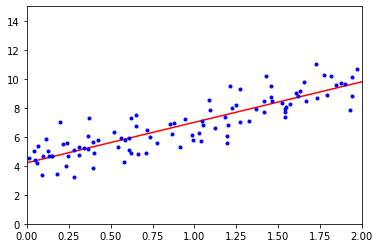

In [53]:
plt.plot(X_test, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [54]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.20831857]), array([[2.79226572]]))

In [55]:
X_test = np.linspace(0, 2, 100).reshape(100, 1)
y_predict = lin_reg.predict(X_test)

In [56]:
# Calculate the mean squared error
y_test = 4 + 3 * X_test + np.random.randn(100, 1)
mean_squared_error = np.mean((y_predict - y_test) ** 2)
mean_squared_error

1.1660399687569682

## Linear regression with gradient descent 

In gradient descent alogrithms, the weights are updated using the gradient of the cost function. The weight update equation is given by:
$$
\pmb{w}_{i+1} = \pmb{w}_{i} - \eta \nabla_{\pmb{w}} MSE(\pmb{w}_{i})
$$
where $ \eta $ is the learning rate.

In [70]:
# Define X and y again for clarity
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Modify X to add a column of ones for the intercept
X_mod = np.c_[np.ones((100, 1)), X]

# Define X_test
X_test = np.array([[0], [2]])
X_test_mod = np.c_[np.ones((2, 1)), X_test]

In [71]:
eta = 0.1
n_iterations = 1000
m = 100

w = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = 2 / m * X_mod.T.dot(X_mod.dot(w) - y)
    w = w - eta * gradients

In [72]:
print("The final weights are:\n", w)

The final weights are:
 [[4.20831857]
 [2.79226572]]


In [73]:
print("The predicted y values are:\n", X_test_mod.dot(w))

The predicted y values are:
 [[4.20831857]
 [9.79285   ]]


To investigate the effect of the learning rate $\eta$ on the convergence of the gradient descent algorithm, we can plot the predicted values of the model and see how the weights converge with the number of iterations.

In [84]:
w_path = []
def plot_gradient_descent(w, eta, w_path=None):
    m = len(X_mod)
    plt.plot(X, y, "b.")
    plt.xlabel("x")
    plt.ylabel("y")
    n_iterations = 1000
    for i in range(n_iterations):
        if i < 10:
            y_predict = X_test_mod.dot(w)
            style = "r-" if i > 0 else "b--"
            plt.plot(X_test_mod, y_predict, style)
        grads = 2 / m * X_mod.T.dot(X_mod.dot(w) - y)
        w = w - eta * grads
        if w_path is not None:
            w_path.append(w)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta))

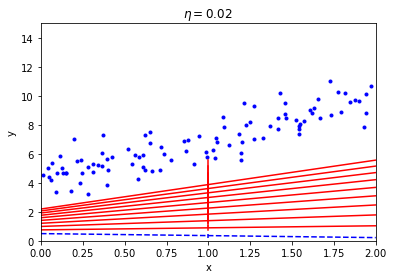

In [85]:
np.random.seed(42)
w = np.random.randn(2, 1)
plot_gradient_descent(w, eta=0.02, w_path=w_path)

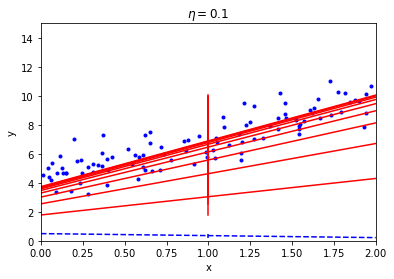

In [86]:
plot_gradient_descent(w, eta=0.1, w_path=w_path)

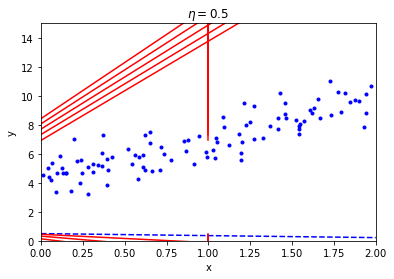

In [87]:
plot_gradient_descent(w, eta=0.5, w_path=w_path)

## Linear regression with stochastic gradient descent